In [1]:
import numpy as np
from scipy.misc import ascent
from matplotlib import pyplot as plt

import loadlib

from SST.utils import *
from SST.streaming.streaming_generators import HorizontalStreaming
from SST.applications.segmentation.streaming_segmentation import quasi_flat_zone_streaming

plt.rcParams['figure.figsize'] = (12.0, 12.0)
%load_ext autoreload

%matplotlib inline

In [2]:
%autoreload 2

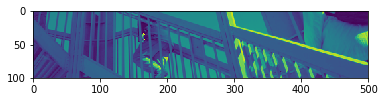

In [3]:
# loading image
im = ascent()
img = im[300:400,:500]

plt.imshow(img)
plt.show()

In [4]:
def plot_segmentation(labels, img_shape, order='F'):

    nr, nc = img_shape

    seg = np.zeros(nr*nc)

    seg[labels[0]] = labels[1]

    plt.imshow(seg.reshape(img_shape, order=order))
    plt.show()

Number of new stable labels at iteration 0 is 4155


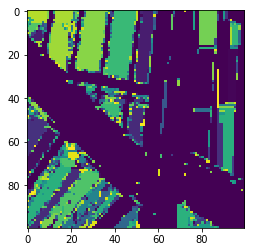

Number of new stable labels at iteration 1 is 13913


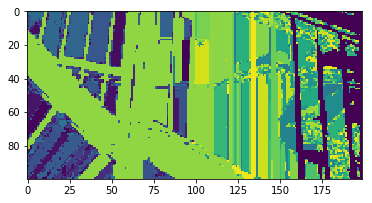

Number of new stable labels at iteration 2 is 9421


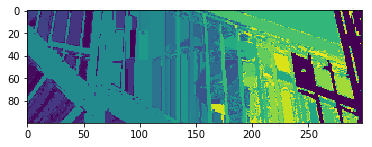

Number of new stable labels at iteration 3 is 3892


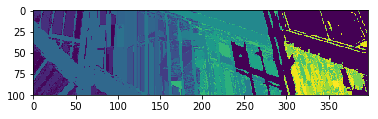

Number of new stable labels at iteration 4 is 2063


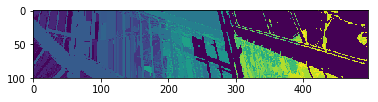

Number of new stable labels at iteration 5 is 16556


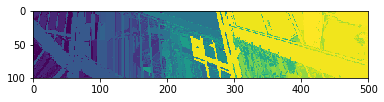

In [11]:
# creating streaming
gen = HorizontalStreaming(img)
stream = gen.generate_stream(block_shape=(100,100))

threshold = 5
for n, (labels, i) in enumerate(quasi_flat_zone_streaming(stream, threshold, return_img=True)):
    print("Number of new stable labels at iteration {} is {}".format(n, labels.shape[1]))
    if n > 0:
        i = stick_two_images(old_i,i,num_overlapping=1,direction='H')
        labels = np.concatenate((old_labels, labels), axis=1)
    img_shape = i.shape[:2]
    plot_segmentation(labels, img_shape, order='F')
    old_i = i
    old_labels = labels